# Hypothesis test + Clustering

### 2 sample t-test

In [1527]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans

In [1437]:
NBA_4th=pd.read_csv("NBA_4th_comp.csv")
first_3=pd.read_csv("first_3_comp.csv")

In [1438]:
first_3.columns

Index(['index', 'Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-', 'Court', 'Opponent',
       'OppPTS', 'OppFGM', 'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%',
       'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB', 'OppREB', 'OppAST',
       'OppTOV', 'OppSTL', 'OppBLK', 'OppPF', 'Pos', 'OppPos', 'Pace',
       'OFFRTG', 'DEFRTG', 'Margin', 'formatted_date', 'week_of_season',
       'PTS/Q'],
      dtype='object')

In [1598]:
#H0:first 3 quarter = 4th quarter
columns=['Pace','OFFRTG','DEFRTG',"3P%","AST",'FT%']
for col in columns:
    t_stat, p_val = stats.ttest_ind(NBA_4th[col], first_3[col])
    print("p value for %s: " % (col) +str(p_val)+" and the tstatistic: " + str(t_stat))

p value for Pace: 2.7140680698868864e-63 and the tstatistic: -17.147024779318944
p value for OFFRTG: 0.07027943821109359 and the tstatistic: 1.810671134654832
p value for DEFRTG: 0.07027943821109019 and the tstatistic: 1.8106711346548543
p value for 3P%: 0.0 and the tstatistic: 80.11950875326889
p value for AST: 0.0 and the tstatistic: -120.74952699652295
p value for FT%: 0.0 and the tstatistic: 118.40449473788514


- reject H0 at the 95% confidence interval for Pace, AST, 3P%,'PTS','FT%
- can´t reject H0 for DEFRTG and OFFRTG

### KMeans Clustering

In [1547]:
teams_3rd=first_3.pivot_table(index="Team",values=["DEFRTG","OFFRTG"],aggfunc=np.mean)
teams_4th=NBA_4th.pivot_table(index="Team",values=["DEFRTG","OFFRTG"],aggfunc=np.mean)
teams_3rd[["DEFRTG_4th","OFFRTG_4th"]]=teams_4th[["DEFRTG","OFFRTG"]]
teams_3rd

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
Team,,,,
ATL,115.146206,110.516574,109.170579,107.506001
BKN,108.857991,109.551514,111.758809,104.275463
BOS,106.121744,110.957184,112.072270,116.848721
CHA,110.869648,107.891612,116.623094,107.048643
CHI,109.326537,105.846661,112.619512,110.514859
CLE,112.154193,107.822060,113.570357,110.675513
DAL,112.807813,116.671344,108.211773,112.834975
DEN,108.471628,111.486667,112.965738,113.962212
DET,113.775885,107.705242,110.655675,108.173088


In [1575]:
samples=teams_3rd.to_numpy()

In [1596]:
classifier=KMeans(n_clusters = 4,random_state=1)
classifier.fit(samples)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

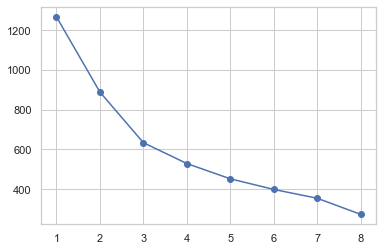

In [1597]:
#four cluster is a good fit

num_clusters=list(range(1,9))
inertias=[]

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')

In [1595]:
classifier.labels_

array([2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3, 3, 0, 0, 3, 3, 0, 2, 3, 2, 0, 2,
       3, 3, 1, 1, 3, 3, 3, 1])

In [1585]:

cluster_zero_indices = []
cluster_one_indices = []
cluster_two_indices = []
cluster_three_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
    elif classifier.labels_[i] == 2:
        cluster_two_indices.append(i)
    elif classifier.labels_[i] == 3:
        cluster_three_indices.append(i)        
print(cluster_zero_indices)

[1 1 3 1 1 1 2 3 1 1 3 3 2 2 3 3 2 1 3 1 2 1 3 0 0 3 0 3 3 0]
[23, 24, 26, 29]


In [1586]:
#teams with bad defense in the 4th
cluster_zero_df = teams_3rd.iloc[cluster_zero_indices]
cluster_zero_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
Team,,,,
PHX,110.866731,108.895702,119.150668,112.895757
POR,115.156847,111.260793,112.275168,116.046693
SAS,111.355130,112.149841,118.036770,112.548584
WAS,114.693123,112.965451,116.430274,116.393098


In [1587]:
#the worst group: bad defense and/or bad offense
cluster_one_df = teams_3rd.iloc[cluster_one_indices]
cluster_one_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
Team,,,,
ATL,115.146206,110.516574,109.170579,107.506001
BKN,108.857991,109.551514,111.758809,104.275463
CHA,110.869648,107.891612,116.623094,107.048643
CHI,109.326537,105.846661,112.619512,110.514859
CLE,112.154193,107.822060,113.570357,110.675513
DET,113.775885,107.705242,110.655675,108.173088
GSW,111.826097,106.341801,108.777996,106.036547
MIN,113.227732,106.620495,111.947148,110.989408
NYK,111.865074,106.879348,110.614482,107.505569


In [1588]:
#elite group: good in the first 3 and in the 4th improved their defense and/or offense
cluster_two_df = teams_3rd.iloc[cluster_two_indices]
cluster_two_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
Team,,,,
DAL,112.807813,116.671344,108.211773,112.834975
LAC,107.777546,111.660535,105.231791,112.088955
LAL,108.464715,113.792941,99.504080,110.290408
MIL,102.703610,110.535378,105.909535,114.777474
OKC,111.969333,111.430100,101.838937,113.452988


In [1589]:
#good teams in the first 3 quarter, but declined in the 4th quartert
cluster_three_df = teams_3rd.iloc[cluster_three_indices]
cluster_three_df

,DEFRTG,OFFRTG,DEFRTG_4th,OFFRTG_4th
Team,,,,
BOS,106.121744,110.957184,112.072270,116.848721
DEN,108.471628,111.486667,112.965738,113.962212
HOU,109.623386,114.674773,112.716697,111.089569
IND,107.057874,109.506906,114.897415,113.051409
MEM,107.384281,110.320317,115.601700,108.407656
MIA,109.671287,113.178710,112.329382,108.986923
NOP,110.128659,111.005424,112.882983,112.596106
PHI,109.114475,109.169902,109.231722,112.005523
SAC,112.676560,109.518723,111.320762,113.277607
